# 1. Install Dependencies and Setup

In [41]:
import tensorflow as tf
import os

In [42]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [43]:
tf.config.list_physical_devices('GPU')

[]

In [44]:
BATCH_SIZE = 32
IMAGE_SIZE = [256, 256]
EPOCHS = 20

# 2. Load Data

In [45]:
import numpy as np
from matplotlib import pyplot as plt

In [46]:
data = tf.keras.utils.image_dataset_from_directory('.\input')

Found 5450 files belonging to 2 classes.


In [47]:
data_classNames = data.class_names
data_classNames

['NORMAL', 'PNEUMONIA']

# 3. Data Visualization & Preprocessing

In [48]:
import seaborn as sns

In [49]:
train_size = int(len(data))

In [50]:
train_size

171

In [51]:
file_list_lable = [0, 0]
class_names = data.class_names
for img, label in data:
    for i in range (len(label)):
        if(label[i] == 0):
            file_list_lable[0] = file_list_lable[0] + 1
        else:
            file_list_lable[1] = file_list_lable[1] + 1
print(file_list_lable)

[1575, 3875]


Text(0.5, 1.0, 'Số lượng các file ứng với các label')

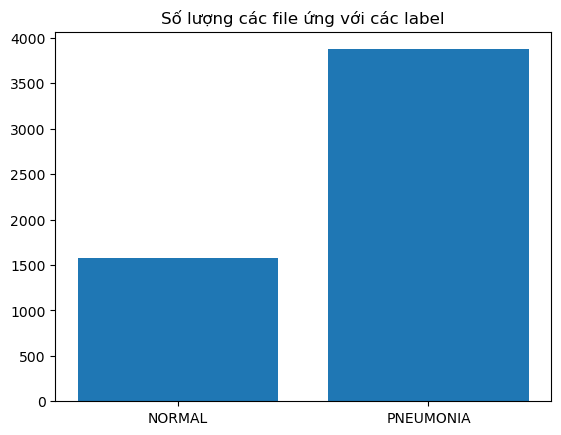

In [52]:
fig, ax = plt.subplots()
ax.bar ( data_classNames, file_list_lable)
ax.set_title ('Số lượng các file ứng với các label')

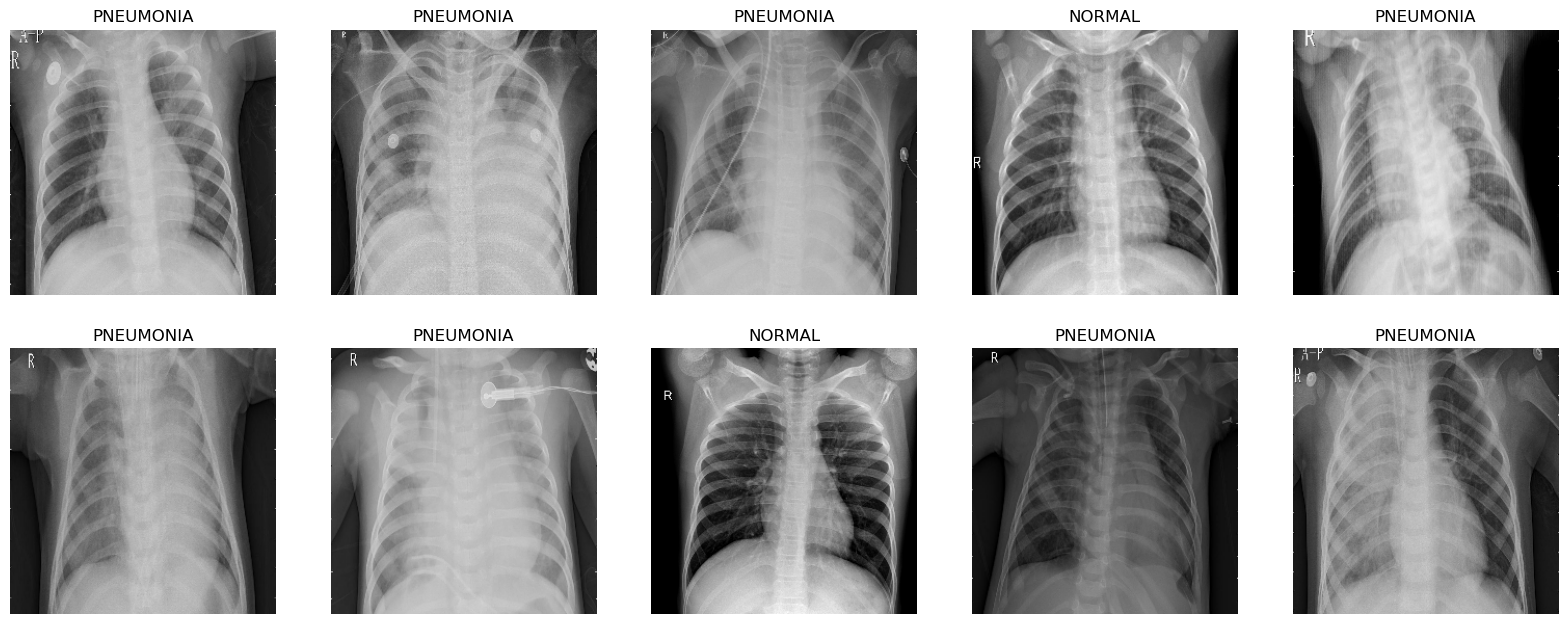

In [53]:
plt.figure(figsize=(20, 20))
for images, labels in data.take(1):
    for i in range(10):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype(int))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [54]:
for image_batch, labels_batch in data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


# 3. Scale Data

In [55]:
data = data.map(lambda x,y: (x/255, y))

In [56]:
# for image_batch, labels_batch in data:
#   print(image_batch[0])
#   print(labels_batch[0])

# 4. Splite Data

In [57]:
train_size = int(len(data)*0.6)
test_size = int(len(data)*0.2)
val_size = int(len(data)*0.2)

In [58]:
train_size

102

In [59]:
test_size

34

In [60]:
val_size

34

In [61]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 5. Build Model

In [62]:
train 

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [63]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization

In [64]:
model = Sequential()

In [65]:

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (256,256,3)))
model.add(BatchNormalization())

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))


In [66]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 batch_normalization_5 (Bat  (None, 256, 256, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 128, 128, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 dropout_4 (Dropout)         (None, 128, 128, 64)      0         
                                                                 
 batch_normalization_6 (Bat  (None, 128, 128, 64)     

# 6. Train

In [68]:
logdir='logs'

In [69]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [70]:
from keras.callbacks import ReduceLROnPlateau

In [71]:
hist = model.fit(train, epochs=EPOCHS, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
102/102 [==============================] - 168s 2s/step - loss: 0.5681 - accuracy: 0.8787 - val_loss: 8.1737 - val_accuracy: 0.7344
Epoch 2/20
102/102 [==============================] - 159s 2s/step - loss: 0.1935 - accuracy: 0.9347 - val_loss: 5.2668 - val_accuracy: 0.7243
Epoch 3/20
102/102 [==============================] - 167s 2s/step - loss: 0.1441 - accuracy: 0.9470 - val_loss: 3.4701 - val_accuracy: 0.7252
Epoch 4/20
102/102 [==============================] - 158s 2s/step - loss: 0.1361 - accuracy: 0.9488 - val_loss: 1.8254 - val_accuracy: 0.7426
Epoch 5/20
102/102 [==============================] - 159s 2s/step - loss: 0.1237 - accuracy: 0.9550 - val_loss: 0.3885 - val_accuracy: 0.9090
Epoch 6/20
102/102 [==============================] - 163s 2s/step - loss: 0.1054 - accuracy: 0.9602 - val_loss: 0.1791 - val_accuracy: 0.9338
Epoch 7/20
102/102 [==============================] - 167s 2s/step - loss: 0.0911 - accuracy: 0.9635 - val_loss: 0.4966 - val_accuracy: 0.8373

In [89]:
print("Loss of the model is - " , model.evaluate(test)[0])
print("Accuracy of the model is - " , model.evaluate(test)[1]*100 , "%")

34/34 [==============================] - 14s 241ms/step - loss: 0.0972 - accuracy: 0.9706
Loss of the model is -  0.09718507528305054
34/34 [==============================] - 13s 235ms/step - loss: 0.0927 - accuracy: 0.9715
Accuracy of the model is -  97.15073704719543 %


# 7. Plot Performance

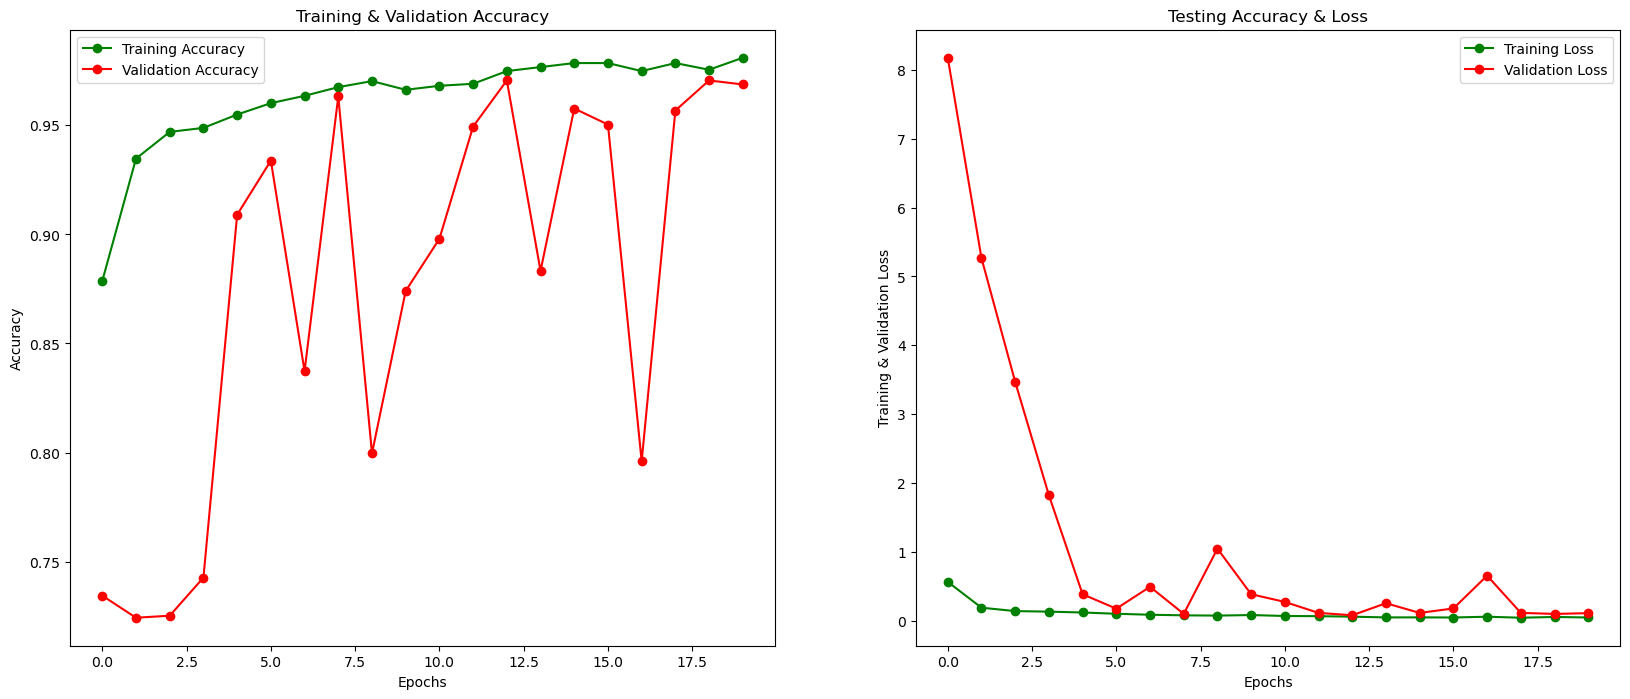

In [91]:
epochs = [i for i in range(EPOCHS)]
fig , ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
fig.set_size_inches(EPOCHS,8)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

# 8. Evaluate

In [74]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [75]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [76]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 246ms/step


In [77]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(0.98350257, shape=(), dtype=float32) tf.Tensor(0.97730136, shape=(), dtype=float32) tf.Tensor(0.9715074, shape=(), dtype=float32)


# 9. Test

In [78]:
import cv2

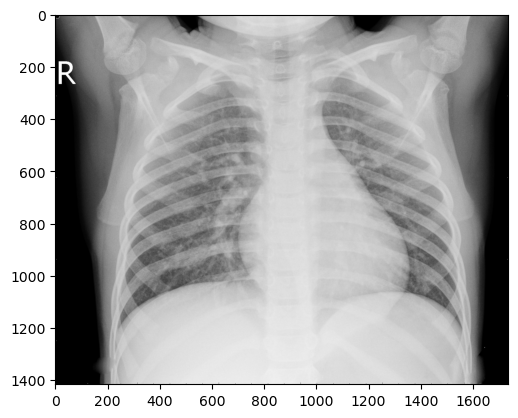

In [79]:
img = cv2.imread('NORMAL2-IM-1431-0001.jpeg')
plt.imshow(img)
plt.show()

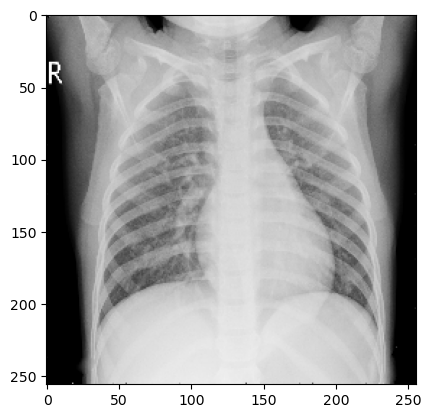

In [80]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [81]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 165ms/step


In [82]:
yhat

array([[0.18414482]], dtype=float32)

In [83]:
if yhat > 0.5: 
    print(f'Predicted class is PNEUMONIA')
else:
    print(f'Predicted class is NORMAL')

Predicted class is NORMAL


# 10. Save the Model

In [84]:
from tensorflow.keras.models import load_model

In [85]:
model.save(os.path.join('models','imageclassfilter_3.h5'))

C:\Users\ACER\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 11. Load Model

In [86]:
new_model = load_model('./models/imageclassfilter.h5')

In [87]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 134ms/step


array([[1.8692988e-05]], dtype=float32)

In [88]:
new_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 batch_normalization_40 (Ba  (None, 256, 256, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 128, 128, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 dropout_32 (Dropout)        (None, 128, 128, 64)      0         
                                                                 
 batch_normalization_41 (Ba  (None, 128, 128, 64)     